In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata as ad

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Read in data

In [2]:
BloodFrame = pd.read_csv("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv",header=0, index_col=0)
BloodGeneID = list(BloodFrame.index.values)
BloodSampleID = BloodFrame.columns.values

# Blood
BloodFrame_ADNI = pd.read_csv("../../../Data/ADNI_blood_gene_expression_gene_aligned_04172023.csv",header=0, index_col=0)
BloodFrame_aligned_ADNI = BloodFrame_ADNI.loc[BloodGeneID,:]
BloodSampleID = BloodFrame_ADNI.columns.values

In [3]:
BloodFrame_aligned_ADNI

,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,003_S_2374,036_S_4491,098_S_4059,...,082_S_4339,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101
A1BG,3.651000,3.183000,3.278000,3.371000,3.358000,3.504000,3.194000,3.002000,3.855000,3.59400,...,3.655000,3.345000,3.330000,3.368000,3.665000,3.302000,3.403000,3.53000,3.532000,3.298000
A2M,3.039000,3.543000,3.528000,3.835000,3.392000,3.081000,3.146000,3.281000,3.974000,3.51100,...,3.725000,3.441000,3.497000,3.128000,3.285000,3.524000,3.515000,3.65100,3.609000,3.804000
A4GALT,2.056500,2.349000,2.526000,2.472000,2.296500,2.353500,2.548000,2.396500,3.026500,2.57200,...,2.582500,2.585500,2.598000,2.374000,2.627000,2.838000,2.771500,2.32800,2.823000,2.774500
AAAS,7.043000,6.773000,6.910000,7.209000,6.920000,7.053000,7.079000,6.618000,7.382000,6.82000,...,7.024000,7.028000,6.950000,6.878000,7.233000,6.805000,7.265000,7.37500,7.257000,6.970000
AAK1,4.282167,4.661833,4.661500,4.608833,4.770167,4.618000,5.224333,4.104500,4.282333,4.42950,...,4.667833,4.728333,4.845333,4.156500,4.826333,4.581667,4.654167,4.50750,4.462667,4.452500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,4.739500,4.702333,4.545333,4.562500,4.890667,4.597833,4.599333,4.643333,4.559833,4.57150,...,4.665833,4.395333,4.435333,4.723667,4.468000,4.472167,4.609833,4.73350,4.091000,4.362333
ZYG11B,5.317500,5.388000,5.628000,5.463000,5.647500,5.573250,5.561250,5.611250,5.293750,5.40025,...,5.320250,5.524250,5.411250,5.362500,5.259750,5.442750,5.140000,5.38775,5.057250,4.992000
ZYX,9.219000,8.378500,9.108500,9.321000,9.030000,8.963500,8.534500,9.034000,10.088000,9.35650,...,9.879500,9.403000,9.310500,9.196500,9.506000,9.290000,9.809000,9.52150,9.581000,9.922500
ZZEF1,7.301000,6.758000,7.336500,7.168500,7.202500,7.047500,6.917500,6.950000,7.680000,6.82400,...,7.536000,7.097500,6.766000,7.177000,6.975000,6.703500,7.281000,6.98250,6.686500,7.264500


In [4]:
BloodFrame

,Sample_003,Sample_004,Sample_014,Sample_021,Sample_031,Sample_037,Sample_040,Sample_050,Sample_057,Sample_058,...,Sample_563,Sample_572,Sample_573,Sample_578,Sample_580,Sample_581,Sample_582,Sample_588,Sample_590,Sample_608
A1BG,4.0,1,2,14.0,1.0,4.0,7,5.0,2,8,...,5.0,10.0,18,8,2,0,0.5,0,12.0,1.0
A2M,5.0,0,0,18.0,4.0,22.0,34,21.0,6,8,...,7.0,9.0,13,14,6,1,0.0,0,11.0,26.0
A4GALT,0.0,0,1,11.0,0.0,0.0,0,3.0,0,8,...,1.0,5.0,0,0,0,0,1.0,0,0.0,0.0
AAAS,121.0,92,1,103.0,156.0,138.0,140,76.0,36,65,...,32.0,107.0,94,68,32,14,36.5,0,105.0,93.0
AAK1,518.0,745,4542,435.0,270.0,448.0,433,406.0,260,148,...,130.0,316.0,302,446,396,114,4121.0,0,232.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,148.0,83,59,78.0,61.0,72.0,105,66.0,40,46,...,27.0,70.0,72,78,83,22,11.5,0,79.0,58.0
ZYG11B,162.0,221,3137,167.0,83.0,212.0,146,119.0,26,139,...,66.0,78.0,143,142,137,31,1689.5,0,90.0,88.0
ZYX,2084.0,1395,20628,1261.0,1180.0,1434.0,494,1194.0,361,1939,...,815.0,1026.0,1834,1545,821,452,7690.5,9,1582.0,648.0
ZZEF1,784.0,961,957,612.0,321.0,585.0,392,696.0,322,205,...,317.0,409.0,455,520,483,159,875.0,0,530.0,316.0


## 1.1 Convert to andata

In [5]:
# read in data
with open("../../../Data/ROSMAP_blood_gene_expression_monocyte_ACTL_04172023.csv") as your_data:
    adata_rosmap = ad.read_csv(your_data, delimiter=',')
adata_rosmap = adata_rosmap.T
    
with open("../../../Data/ANMerge_blood_rna_gene_expr_removedbatch_02022024 2.csv") as your_data:
    adata_adni = ad.read_csv(your_data, delimiter=',')
adata_adni = adata_adni.T
    
# read in label
Blood_Info = pd.read_csv("../../../Data/ROSMAP_blood_clinical_monocyte_ACTL_04172023.csv",header=0, index_col=0)

# read in label
Blood_Adni_Info = pd.read_csv("../../../Data/ANMerge_NewModel_NewLabel_Clinical_Info.csv",header=0, index_col=0)
    

In [6]:
Blood_Info

,individualID,projid,msex,race,apoe_genotype,age_at_visit_max,age_death,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,Group1,Group2,specimenID
1,R1528689,402800,0,1,34.0,79.701574264202605,80.65708418891171,13.0,5.500000,5,1,4,4,Typical AD,Typical.AD,Sample_003
2,R3978789,482428,0,1,23.0,82.321697467488022,83.690622861054067,30.0,3.933333,4,4,1,1,Asym AD,Asym.AD,Sample_004
3,R5422277,3052480,0,1,23.0,90+,90+,15.0,10.583333,4,2,2,2,Asym AD,Asym.AD,Sample_014
4,R1408411,4127190,0,1,23.0,87.750855578370974,88.637919233401774,29.0,18.166667,2,4,1,1,Control,Control,Sample_021
5,R9033345,6107196,1,1,33.0,90+,90+,22.0,4.166667,5,1,4,4,Typical AD,Typical.AD,Sample_031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,R4937504,92393245,0,1,23.0,90+,90+,26.0,8.283333,5,1,1,1,Asym AD,Asym.AD,Sample_581
154,R6119857,92427316,1,1,33.0,88.662559890485966,89.226557152635181,24.0,43.883333,4,1,1,1,Asym AD,Asym.AD,Sample_582
155,R8186418,93787649,1,1,33.0,86.132785763175903,86.35455167693361,27.0,4.250000,1,2,5,5,Low-NFT AD,LowNFT.AD,Sample_588
156,R2157677,94144536,0,1,33.0,90+,90+,24.0,8.216667,5,1,2,2,Asym AD,Asym.AD,Sample_590


In [7]:
adata_rosmap

AnnData object with n_obs × n_vars = 157 × 7704

In [8]:
import collections
# For rosmap blood
Blood_ROSMAP_Info = Blood_Info
BloodSampleID_Rosmap = list(adata_rosmap.obs.index)

SID = list(Blood_ROSMAP_Info.specimenID)
ADType = list(Blood_ROSMAP_Info.Group1)
Mapping = {'Control': 0, 'Typical AD': 1, 'Asym AD': 2, 'Low-NFT AD': 3}
frequency_rosmap = collections.Counter(ADType)
print(dict(frequency_rosmap))

Rosmap_Sample_CN = list()
Rosmap_Sample_TAD = list()
Rosmap_Sample_AAD = list()
for i in range(len(SID)):
    if ADType[i] == 'Control':
        Rosmap_Sample_CN.append(SID[i])
    if ADType[i] == 'Typical AD' or ADType[i] == 'Low-NFT AD':
        Rosmap_Sample_TAD.append(SID[i])
    if ADType[i] == 'Asym AD':
        Rosmap_Sample_AAD.append(SID[i])
#print(Rosmap_Sample_CN)
#print(Rosmap_Sample_TAD)
#print(Rosmap_Sample_AAD)

SType_Blood_Rosmap = list()
for i in range(len(BloodSampleID_Rosmap)):
    if BloodSampleID_Rosmap[i] in SID:
        indt = SID.index(BloodSampleID_Rosmap[i])
        tmp = Mapping[ADType[indt]]
        SType_Blood_Rosmap.append(tmp)
print(SType_Blood_Rosmap)
print(len(SType_Blood_Rosmap))

{'Typical AD': 46, 'Asym AD': 88, 'Control': 18, 'Low-NFT AD': 5}
[1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 3, 2, 1, 0, 2, 2, 3, 1, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2]
157


In [9]:
Blood_Adni_Info

,Gender,Age,DX,Site,Batch,OnsetAge,OnsetPattern,MMSE,CDRSOB,CDRTotal,n_counts_all,braaksc_trans,NewLabel
DCR00001_1,Female,80.0,AD,DCR,2,80.0,Sudden,21.0,5.0,1.0,42117.785151,4.0,Typical AD
DCR00004_1,Male,78.0,MCI,DCR,2,inf,NaN,27.0,0.5,0.5,42250.311047,4.0,Asym AD
DCR00009_1,Female,69.0,CTL,DCR,2,inf,NaN,30.0,0.0,0.0,42381.786290,5.0,Others
DCR00013_1,Male,82.0,CTL,DCR,2,inf,NaN,30.0,0.0,0.0,42412.324438,4.0,Others
DCR00014_1,Female,75.0,CTL,DCR,2,inf,NaN,30.0,inf,inf,42182.455182,4.0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLSMCI607_1,Female,72.0,MCI,Toulouse,1,69.0,NaN,29.0,1.0,0.5,42217.426638,5.0,Asym AD
TLSMCI608_1,Male,73.0,MCI,Toulouse,1,71.0,NaN,28.0,1.0,0.5,42045.586316,4.0,Asym AD
TLSMCI609_1,Female,63.0,MCI,Toulouse,2,53.0,NaN,28.0,0.5,0.5,42470.600581,4.0,Asym AD
TLSMCI611_1,Female,78.0,MCI,Toulouse,2,77.0,NaN,30.0,1.0,0.5,42430.076753,4.0,Asym AD


In [11]:
Adni_SID = list(Blood_Adni_Info.index)
Adni_Type = list(Blood_Adni_Info.DX)
Adni_CRD = list(Blood_Adni_Info.CDRSOB)

SID_data = list(adata_adni.obs.index)

Adni_Type_Data = list()
for i in range(len(SID_data)):
    if SID_data[i] in Adni_SID:
        indt = Adni_SID.index(SID_data[i])
        tmp = Adni_Type[indt]
        Adni_Type_Data.append(tmp)
print(Adni_Type_Data)

['AD', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'MCI', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'AD', 'AD', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'MCI', 'CTL', 'AD', 'CTL', 'MCI', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'CTL', 'MCI', 'AD', 'CTL', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'MCI', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'AD', 'CTL', 'CTL', 'CTL', 'CTL', 'AD', 'CTL', 'AD', 'AD', 'MCI', 'AD', 'CTL', 'MCI', 'CTL', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'MCI', 'CTL', 'MCI', 'MCI', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'A

In [12]:
braaklist = list(Blood_Info.braaksc)
braaklist = [str(i) for i in braaklist]

In [13]:
adata_rosmap.obs["RosmapBraak"] = braaklist#list(Blood_Info.braaksc)


In [14]:
sc.pp.log1p(adata_rosmap)
sc.pp.pca(adata_rosmap)
sc.pp.neighbors(adata_rosmap)
sc.tl.umap(adata_rosmap)

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


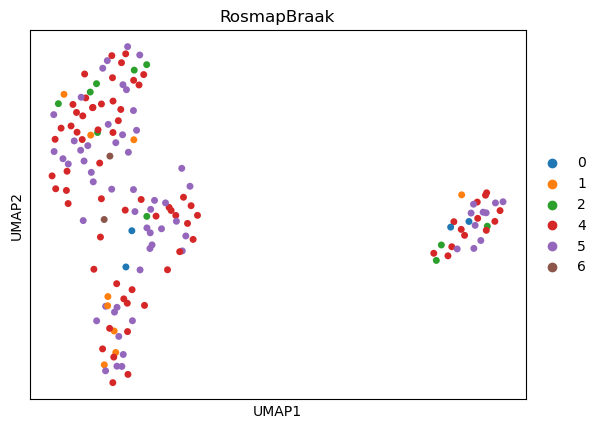

In [15]:
sc.pl.umap(adata_rosmap, color='RosmapBraak', size=100)


In [16]:
adata_adni.obs["AdniLabel"] =Adni_Type_Data
adata_adni.obs["CDRSB"] = Adni_CRD

sc.pp.pca(adata_adni)
sc.pp.neighbors(adata_adni)
sc.tl.umap(adata_adni)

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


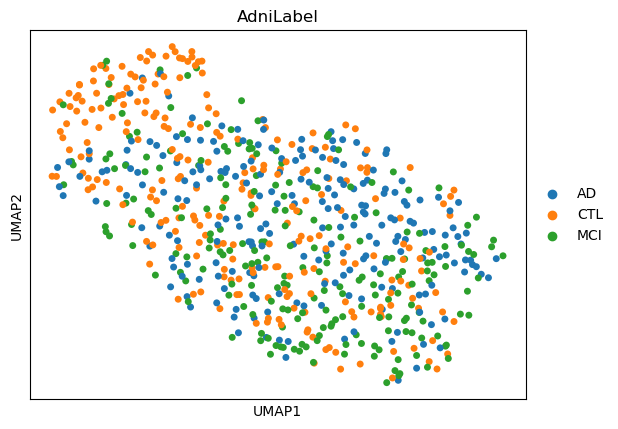

In [17]:
sc.pl.umap(adata_adni, color = 'AdniLabel', size=100)

In [18]:
adata_concat_raw = adata_rosmap.concatenate(adata_adni, batch_categories=['rosmap', 'adni'])

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


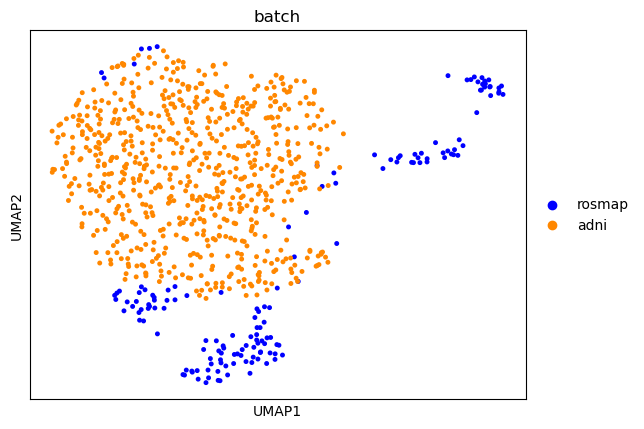

In [19]:

sc.pp.neighbors(adata_concat_raw)
sc.tl.umap(adata_concat_raw)
sc.pl.umap(adata_concat_raw, color=['batch'], palette={'rosmap':'blue', 'adni':(1,135/255.,0)}, size=50, save="raw_rosmpa_adni.svg")



In [20]:
adata_rosmap

AnnData object with n_obs × n_vars = 157 × 7704
    obs: 'RosmapBraak'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'RosmapBraak_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# 2. Integrate by ingest

In [26]:
genelist1 = list(adata_adni.var.index)
genelist2 = list(adata_rosmap.var.index)
geneoverlap = list(set(genelist1) & set(genelist2))

In [29]:
adata_rosmap = adata_rosmap[:,geneoverlap]
adata_adni = adata_adni[:,geneoverlap]

In [30]:
sc.tl.ingest(adata_adni, adata_rosmap, obs='RosmapBraak')

In [31]:
adata_rosmap.uns["RosmapBraak_colors"] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
adata_adni.uns["RosmapBraak_colors"]=adata_rosmap.uns["RosmapBraak_colors"]

/var/folders/x5/p97rd26d6y719tstlhqtn9zr0000gr/T/ipykernel_13344/2952749450.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_rosmap.uns["RosmapBraak_colors"] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


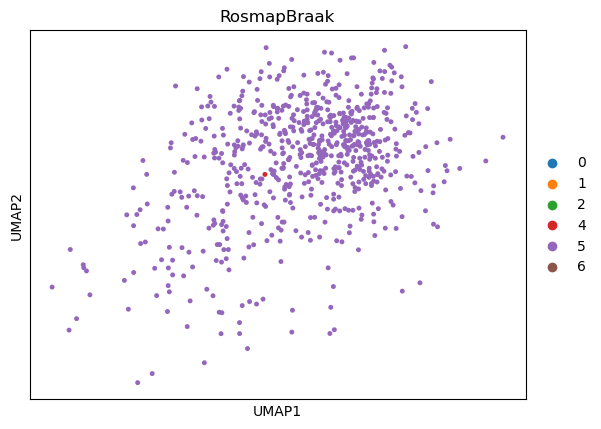

In [32]:
sc.pl.umap(adata_adni, color=['RosmapBraak'], size=50)


In [33]:
adata_concat = adata_rosmap.concatenate(adata_adni, batch_categories=['rosmap', 'adni'])

/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [34]:
adata_concat.obs.RosmapBraak = adata_concat.obs.RosmapBraak.astype('category')
adata_concat.obs.RosmapBraak.cat.reorder_categories(adata_rosmap.obs.RosmapBraak.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['RosmapBraak_colors'] = adata_rosmap.uns['RosmapBraak_colors']  # fix category colors



/var/folders/x5/p97rd26d6y719tstlhqtn9zr0000gr/T/ipykernel_13344/90861308.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_concat.obs.RosmapBraak.cat.reorder_categories(adata_rosmap.obs.RosmapBraak.cat.categories, inplace=True)  # fix category ordering


/Users/yijwang-admin/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


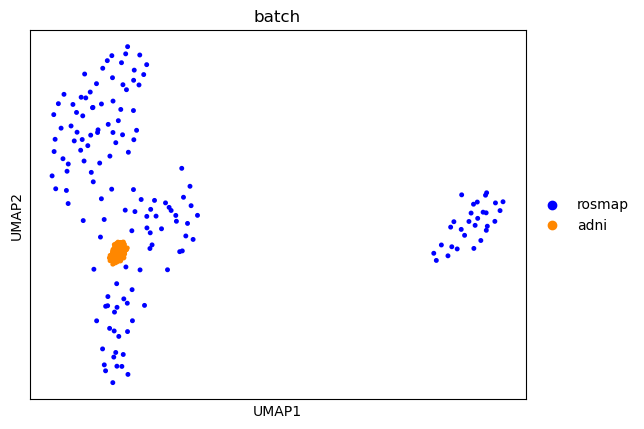

In [35]:

sc.pl.umap(adata_concat, color=['batch'], palette={'rosmap':'blue', 'adni':(1,135/255.,0)}, size=50, save="ingest_rosmpa_adni.svg")

In [36]:
adata_adni.obs

,AdniLabel,CDRSB,RosmapBraak
DCR00001_1,AD,5.0,5
DCR00004_1,MCI,0.5,5
DCR00009_1,CTL,0.0,5
DCR00013_1,CTL,0.0,5
DCR00014_1,CTL,inf,5
...,...,...,...
TLSMCI607_1,MCI,1.0,5
TLSMCI608_1,MCI,1.0,5
TLSMCI609_1,MCI,0.5,5
TLSMCI611_1,MCI,1.0,5


In [37]:
Label = list()
SID = list(adata_adni.obs.index)
for gt in SID:
    CRD = adata_adni.obs.loc[gt,:].CDRSB
    Braak_t = adata_adni.obs.loc[gt,:].RosmapBraak
    Braak = int(Braak_t)
    Dx = adata_adni.obs.loc[gt,:].AdniLabel
    if CRD > 4 and Braak >=4:# and Dx == 'Dementia':
        Label.append("Typical AD")
    elif CRD <= 4 and Braak >=4 and CRD > 0:
        Label.append("Asym AD")
    elif CRD > 4 and Braak <=2:
        Label.append("Low-NFT AD")
    elif CRD == 0 and Braak <=2:# and Dx == 'CN':
        Label.append("Control")
    else:
        Label.append("Others")
                                   

In [38]:
adata_adni.obs['NewLabel_ingest'] = Label

In [39]:
counter = collections.Counter(Label)
print(counter)

Counter({'Asym AD': 285, 'Typical AD': 210, 'Others': 196})


In [40]:
adata_adni.obs

,AdniLabel,CDRSB,RosmapBraak,NewLabel_ingest
DCR00001_1,AD,5.0,5,Typical AD
DCR00004_1,MCI,0.5,5,Asym AD
DCR00009_1,CTL,0.0,5,Others
DCR00013_1,CTL,0.0,5,Others
DCR00014_1,CTL,inf,5,Typical AD
...,...,...,...,...
TLSMCI607_1,MCI,1.0,5,Asym AD
TLSMCI608_1,MCI,1.0,5,Asym AD
TLSMCI609_1,MCI,0.5,5,Asym AD
TLSMCI611_1,MCI,1.0,5,Asym AD


In [47]:
df = adata_adni.obs[adata_adni.obs.NewLabel_ingest=='Asym AD']
counter = collections.Counter(df['AdniLabel'])
print(counter)
Acc_Asym = (counter['CTL'] + counter['MCI']) / df.shape[0]
print("Asym AD transfer accuracy is ", Acc_Asym)

Counter({'MCI': 200, 'AD': 49, 'CTL': 36})
Asym AD transfer accuracy is  0.8280701754385965


In [48]:
df = adata_adni.obs[adata_adni.obs.NewLabel_ingest=='Typical AD']
counter = collections.Counter(df['AdniLabel'])
print(counter)
Acc_TAD = (counter['AD'] + counter['MCI']) / df.shape[0]
print("Typical AD transfer accuracy is ", Acc_TAD)

Counter({'AD': 174, 'CTL': 20, 'MCI': 16})
Typical AD transfer accuracy is  0.9047619047619048


In [49]:
df = adata_adni.obs[adata_adni.obs.NewLabel_ingest=='Low-NFT AD']
counter = collections.Counter(df['AdniLabel'])
print(counter)
Acc_LTau = (counter['AD'] + counter['MCI']) / df.shape[0]
print("Low-NFT AD transfer accuracy is ", Acc_LTau)

Counter()


ZeroDivisionError: division by zero

In [50]:
df = adata_adni.obs[adata_adni.obs.NewLabel_ingest=='Control']
counter = collections.Counter(df['AdniLabel'])
print(counter)
Acc_CN = (counter['CTL']) / df.shape[0]
print("Control transfer accuracy is ", Acc_CN)

Counter()


ZeroDivisionError: division by zero

In [51]:
df = adata_adni.obs[adata_adni.obs.NewLabel_ingest=='Others']
counter = collections.Counter(df['AdniLabel'])
print(counter)

Counter({'CTL': 193, 'MCI': 3})


In [52]:
Acc_Avg = (Acc_Asym + Acc_CN + Acc_LTau + Acc_TAD)/4
print("Avg acc is ", Acc_Avg)

NameError: name 'Acc_CN' is not defined

In [22]:
import numpy as np
y_pred_lb = list(adata_adni.obs['RosmapLabel'])
Mapping = {'Control': 0, 'Typical AD': 1, 'Asym AD': 2, 'Low-NFT AD': 3}
y_pred = np.zeros(len(y_pred_lb))
for i in range(len(y_pred_lb)):
    y_pred[i] = Mapping[y_pred_lb[i]]

In [23]:
Mapping = {'CN': 0, 'Dementia': 1, 'MCI': 2}
y_true_lb = Adni_Type_Data
y_true = np.zeros(len(y_true_lb))
for i in range(len(y_true_lb)):
    y_true[i] = Mapping[y_true_lb[i]]

In [24]:
pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))
if len(pred_ind_cn) == 0:
    print("precision of CN is 0")
else:
    print("precision of CN is ", len(overlap)/len(pred_ind_cn))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
overlap = list(set(pred_ind_tad) & set(true_ind_tad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))
print("precision of AAD is ", len(overlap)/len(pred_ind_aad))

precision of CN is 0
precision of TAD is  0.1490857946554149
precision of AAD is  0.3939393939393939


In [25]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_true, y_pred)

-0.05231547544703505

In [26]:
pred_ind_cn = np.where(y_pred==0)[0]
true_ind_cn = np.where(y_true==0)[0]
overlap = list(set(pred_ind_cn) & set(true_ind_cn))
#if len(pred_ind_cn) == 0:
#    print("precision of CN is 0")
#else:
#    print("precision of CN is ", len(overlap)/len(pred_ind_cn))


pred_ind_aad = np.where(y_pred==2)[0]
true_ind_aad = np.where(y_true==2)[0]
overlap = list(set(pred_ind_aad) & set(true_ind_aad))
#print("precision of AAD is ", len(overlap)/len(pred_ind_aad))

pred_ind_tad = np.where(y_pred==1)[0]
true_ind_tad = np.where(y_true==1)[0]
true_ind_tad_aad = list(true_ind_aad) + list(true_ind_tad)
overlap = list(set(pred_ind_tad) & set(true_ind_tad_aad))
print("precision of TAD is ", len(overlap)/len(pred_ind_tad))

pred_ind_aad_cn = list(pred_ind_aad) #+ list(pred_ind_cn)
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
print("precision of AAD  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_aad_cn = list(pred_ind_cn) #list(pred_ind_aad) + 
true_ind_aad_cn = list(true_ind_cn) + list(true_ind_aad)
overlap = list(set(pred_ind_aad_cn) & set(true_ind_aad_cn))
if len(pred_ind_aad_cn) == 0:
    print("precision of CN  is 0")
else:
    print("precision of CN  is ", len(overlap)/len(pred_ind_aad_cn))

pred_ind_lt = np.where(y_pred==3)[0]
true_ind_lt = np.where(y_true==1)[0]
true_ind_lt_aad = list(true_ind_aad) + list(true_ind_lt)
overlap = list(set(pred_ind_lt) & set(true_ind_lt_aad))
if len(pred_ind_lt) == 0:
    print("precision of LowTau is 0")
else:
    print("precision of LowTau is ", len(overlap)/len(pred_ind_lt))

precision of TAD is  0.6680731364275668
precision of AAD  is  0.696969696969697
precision of CN  is 0
precision of LowTau is 0
